In [1]:
import pandas as pd

## Checking a Protein Sequence Structure from a fasta file

In [2]:
import requests
from Bio import SeqIO
from io import StringIO

# URL of the FASTA file
fasta_url = "https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/POS_TRAIN.fasta"

# Get the content of the URL
response = requests.get(fasta_url)

# Convert the content to a file-like object
fasta_file = StringIO(response.text)

# Read the FASTA file
records = SeqIO.parse(fasta_file, "fasta")

In [3]:
# Convert the iterator into a dictionary
records_dict = [dict(id=record.id, description=record.description, sequence=str(record.seq)) for record in records]

# Print the dictionary
print(len(records_dict))

2317


In [4]:
records_dict[0]

{'id': 'sp|A0A023GPI8|LECA_CANBL',
 'description': 'sp|A0A023GPI8|LECA_CANBL Lectin alpha chain OS=Canavalia boliviana OX=232300 PE=1 SV=1',
 'sequence': 'ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVGKRLSAVVSYPNGDSATVSYDVDLDNVLPEWVRVGLSATTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGRDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFDATFTFLIKSSDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN'}

In [5]:
# Iterate over each record in the file
for record in records:
    # Access the record ID, description, and sequence
    record_id = record.id
    description = record.description
    sequence = record.seq

    # Print the record information
    print("Record ID:", record_id)
    print("Description:", description)
    print("Sequence:", sequence)
    print("Sequence length:", len(sequence))
    print()
    break

## Checking a tsv file to look up metal-binding sites

In [6]:
tsv_url = "https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/POS_TRAIN.tsv"

df = pd.read_csv(tsv_url, sep='\t')

df.head()

,Accession,Evidence,ChEBI-ID,Position
0,Q8INK9,ECO:0000269,CHEBI:29105,157
1,Q8INK9,ECO:0000269,CHEBI:29105,96
2,Q1QT89,ECO:0000269,CHEBI:18420,263
3,P07327,ECO:0000269,CHEBI:29105,101
4,P07327,ECO:0007744,CHEBI:29105,104


In [7]:
len(df)

18043

In [8]:
for column in df.columns:
    print(len(df[column].unique()))

2317
2
23
1267


## Checking a tsv file to look up chebi-id for metal-bindings.

In [9]:
tsv_url_chebi = "https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/ChEBI-IDs_for_metal_binding.tsv"

df_chebi = pd.read_csv(tsv_url_chebi, sep='\t')

df_chebi.head()

,ChEBI-ID,Name,ChEBI-ID Parents
0,CHEBI:48775,Cd(2+),"CHEBI:60240,CHEBI:25213"
1,CHEBI:29108,Ca(2+),"CHEBI:60240,CHEBI:25213"
2,CHEBI:48828,Co(2+),"CHEBI:60240,CHEBI:25213"
3,CHEBI:49415,Co(3+),CHEBI:25213
4,CHEBI:23378,Cu cation,CHEBI:25213


In [10]:
len(df_chebi)

29

In [11]:
for column in df_chebi.columns:
    print(len(df_chebi[column].unique()))

29
29
9


## Merging two dataframe

In [12]:
merged_df = pd.merge(df, df_chebi, on='ChEBI-ID')
merged_df.head()

,Accession,Evidence,ChEBI-ID,Position,Name,ChEBI-ID Parents
0,Q8INK9,ECO:0000269,CHEBI:29105,157,Zn(2+),"CHEBI:60240,CHEBI:25213"
1,Q8INK9,ECO:0000269,CHEBI:29105,96,Zn(2+),"CHEBI:60240,CHEBI:25213"
2,P07327,ECO:0000269,CHEBI:29105,101,Zn(2+),"CHEBI:60240,CHEBI:25213"
3,P07327,ECO:0007744,CHEBI:29105,104,Zn(2+),"CHEBI:60240,CHEBI:25213"
4,U3KRG1,ECO:0007744,CHEBI:29105,147,Zn(2+),"CHEBI:60240,CHEBI:25213"


In [13]:
len(merged_df)

18043

In [14]:
len(merged_df['Accession'].unique()) == len(records_dict)

True

## Check the distributions of the size of the sequences

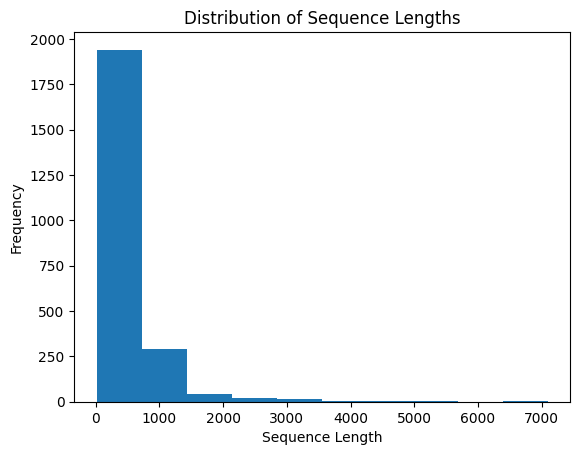

In [15]:
import matplotlib.pyplot as plt

# Get the lengths of the sequences
sequence_lengths = [len(record['sequence']) for record in records_dict]

# Create a histogram
plt.hist(sequence_lengths, bins=10)

# Set the labels and title
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')

# Show the histogram
plt.show()

In [25]:
# counts of name columns in histogram
name_counts = merged_df['Name'].value_counts()

name_counts

Name
Zn(2+)                     5788
Ca(2+)                     4768
Mg(2+)                     2140
Mn(2+)                     1136
Fe cation                   919
[4Fe-4S] cluster            885
a divalent metal cation     738
Cu cation                   561
[2Fe-2S] cluster            348
K(+)                        163
Na(+)                       142
Fe(3+)                      136
Ni(2+)                       77
Co(2+)                       50
Cd(2+)                       50
[3Fe-4S] cluster             36
Cu(2+)                       33
Cu(+)                        27
Fe(2+)                       22
[Ni-4Fe-4S] cluster          12
[Ni-4Fe-5S] cluster           6
Co(3+)                        4
Hg(2+)                        2
Name: count, dtype: int64

## Filtering by length

In [16]:
filtered_records = [record for record in records_dict if len(record['sequence']) <= 1024] # 1024 is the max length of the sequence (just for beginning)

In [17]:
filtered_records[0]

{'id': 'sp|A0A023GPI8|LECA_CANBL',
 'description': 'sp|A0A023GPI8|LECA_CANBL Lectin alpha chain OS=Canavalia boliviana OX=232300 PE=1 SV=1',
 'sequence': 'ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVGKRLSAVVSYPNGDSATVSYDVDLDNVLPEWVRVGLSATTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGRDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFDATFTFLIKSSDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN'}

## Adjusting id column

In [18]:
# Remove the description part of the records
records_cleaned = [{'id': record['id'].split('|')[1], 'sequence': record['sequence']} for record in filtered_records] # first two characters are repeating in id part but there is no repetition in the dataframe. So we can remove them.
records_cleaned[0]

{'id': 'A0A023GPI8',
 'sequence': 'ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIYNSVGKRLSAVVSYPNGDSATVSYDVDLDNVLPEWVRVGLSATTGLYKETNTILSWSFTSKLKSNSTHETNALHFMFNQFSKDQKDLILQGDATTGRDGNLELTRVSSNGSPQGSSVGRALFYAPVHIWESSAVVASFDATFTFLIKSSDSHPADGIAFFISNIDSSIPSGSTGRLLGLFPDAN'}

## Add new attribute to the dictionary as matching metal-binding-sites using dataframe above

In [24]:
# Create a dictionary to store the metal-binding sites
bindings_dict = {}

# Iterate over each record in the cleaned records
for record in records_cleaned:
    # Get the accession ID from the record
    accession_id = record['id']
    # Get the corresponding ChEBI-ID indices from the merged dataframe
    indices = merged_df.loc[merged_df['Accession'] == accession_id]
    print(indices)

        Accession     Evidence     ChEBI-ID  Position    Name   
8809   A0A023GPI8  ECO:0000269  CHEBI:29108        12  Ca(2+)  \
9102   A0A023GPI8  ECO:0000269  CHEBI:29108        10  Ca(2+)   
10478  A0A023GPI8  ECO:0000269  CHEBI:29108        19  Ca(2+)   
12131  A0A023GPI8  ECO:0000269  CHEBI:29108        14  Ca(2+)   
13862  A0A023GPI8  ECO:0000269  CHEBI:29035        10  Mn(2+)   
13863  A0A023GPI8  ECO:0000269  CHEBI:29035         8  Mn(2+)   
14451  A0A023GPI8  ECO:0000269  CHEBI:29035        24  Mn(2+)   
14509  A0A023GPI8  ECO:0000269  CHEBI:29035        19  Mn(2+)   

              ChEBI-ID Parents  
8809   CHEBI:60240,CHEBI:25213  
9102   CHEBI:60240,CHEBI:25213  
10478  CHEBI:60240,CHEBI:25213  
12131  CHEBI:60240,CHEBI:25213  
13862  CHEBI:60240,CHEBI:25213  
13863  CHEBI:60240,CHEBI:25213  
14451  CHEBI:60240,CHEBI:25213  
14509  CHEBI:60240,CHEBI:25213  
        Accession     Evidence     ChEBI-ID  Position    Name   
8055   A0A067XG71  ECO:0007744  CHEBI:29108        1

KeyboardInterrupt: 